# Convolutional Neural Network

*170616 Masahiro Rikiso*

---

学習リソース：

* [cs231n](http://cs231n.stanford.edu/syllabus.html)

In [2]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [6]:
from utils import save_model_viz, save_weights, save_hist, plot_hist
from utils import load_mnist_3D

In [7]:
RUN_ID = 'cnn'

## 学習用データの作成

In [8]:
(x_train, y_train), (x_test, y_test) = load_mnist_3D()

## モデルの学習

Input(28,28,1) -- Conv(64, ReLU) -- Conv(64, ReLU) -- MaxPool(2) -- Dropout -- Flatten -- FC(128, ReLU) -- FC(10, Softmax)

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',
          input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

save_model_viz(RUN_ID, model)

hist = model.fit(x_train, y_train, epochs=12, batch_size=128,
                 verbose=1, validation_data=(x_test, y_test))

save_weights(RUN_ID, model)
save_hist(RUN_ID, hist)
plot_hist(RUN_ID)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
43392/60000 [====================>.........] - ETA: 85s - loss: 0.2706 - acc: 0.9158

KeyboardInterrupt: 

<font color='red' size=5>CPUじゃだるすぎる（GPU使おう）！！！</font>

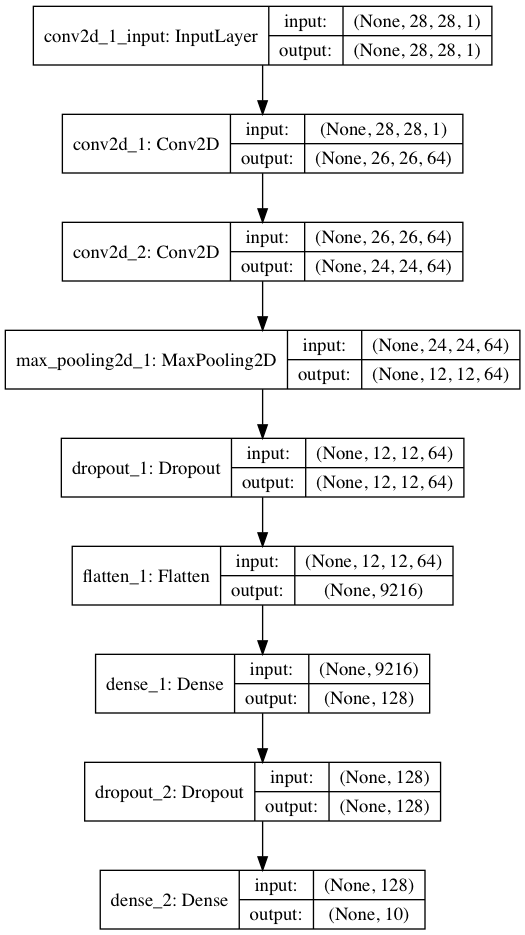

In [12]:
from IPython.display import Image
Image("model/cnn_vis.png")